In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
churn_df = pd.read_csv('telecom_project.csv')

In [73]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
churn_df.shape

(7043, 21)

In [75]:
churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [76]:
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [77]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [183]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.1+ MB


In [79]:
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].astype('object')


In [80]:
# churn_df['TotalCharges'] = churn_df['TotalCharges'].astype('float64')
churn_df['TotalCharges'] = churn_df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

### Replace missing value

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


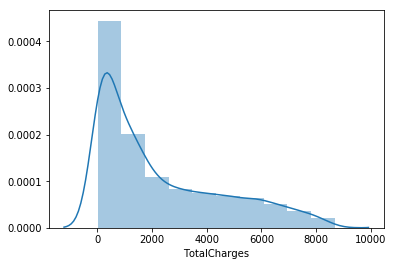

In [81]:
sns.distplot(churn_df.TotalCharges[~np.isnan(churn_df['TotalCharges'])],bins=10,kde=True)

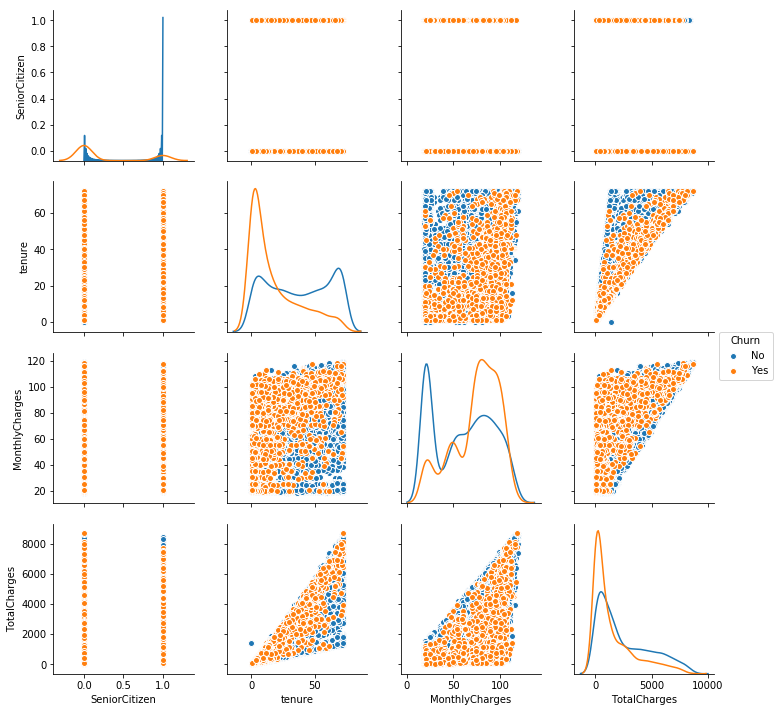

In [264]:
sns.pairplot(churn_df, hue='Churn',diag_kind='kde')

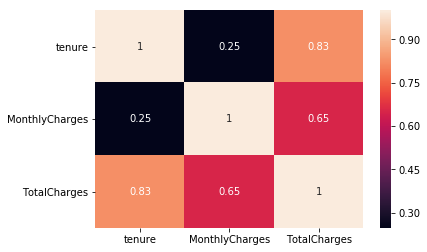

In [384]:
sns.heatmap(churn_df.corr(),annot=True)

In [82]:
churn_df['TotalCharges'].median()

1397.475

In [83]:
churn_df['TotalCharges'].fillna(value=churn_df['TotalCharges'].median(),inplace=True)

## Get all the counts of object variables

In [107]:
for col in churn_df.columns:
    
    if churn_df[col].dtype == 'object' and col != 'customerID':
        print ("#############################")
        print ("Column: " + col)
        print ("______________________________")
        print (churn_df[col].value_counts())
         

#############################
Column: gender
______________________________
Male      3555
Female    3488
Name: gender, dtype: int64
#############################
Column: SeniorCitizen
______________________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
#############################
Column: Partner
______________________________
No     3641
Yes    3402
Name: Partner, dtype: int64
#############################
Column: Dependents
______________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
#############################
Column: PhoneService
______________________________
Yes    6361
No      682
Name: PhoneService, dtype: int64
#############################
Column: MultipleLines
______________________________
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
#############################
Column: InternetService
______________________________
Fiber optic    3096
DSL            2421
No        

### Convert factor variables to dummy variables

In [262]:
churn_df = temp_newdf

In [263]:
temp_newdf = churn_df

In [187]:
def get_dummy_values(col_name, data_frame):
    temp_df = pd.get_dummies(data_frame[col_name], drop_first=False, prefix = col_name, prefix_sep='_')
#     print (temp_df.head())
    new_df = pd.concat([data_frame,temp_df],axis=1)
#     print (new_df.head())
    new_df.drop([col_name],axis=1,inplace=True)
#     print (new_df.head())
    return new_df

In [188]:
new_df = get_dummy_values('Partner',churn_df)
new_df = get_dummy_values('SeniorCitizen',new_df)

In [189]:
new_df = get_dummy_values('Dependents',new_df)
new_df = get_dummy_values('PhoneService',new_df)
new_df = get_dummy_values('MultipleLines',new_df)
new_df = get_dummy_values('InternetService',new_df)
new_df = get_dummy_values('OnlineSecurity',new_df)
new_df = get_dummy_values('OnlineBackup',new_df)
new_df = get_dummy_values('TechSupport',new_df)
new_df = get_dummy_values('DeviceProtection',new_df)
new_df = get_dummy_values('StreamingTV',new_df)
new_df = get_dummy_values('StreamingMovies',new_df)
new_df = get_dummy_values('Contract',new_df)
new_df = get_dummy_values('PaperlessBilling',new_df)
new_df = get_dummy_values('PaymentMethod',new_df)



In [198]:
new_df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,SeniorCitizen_0,SeniorCitizen_1,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Split the data

In [310]:
x = new_df.drop(['customerID', 'Churn','MonthlyCharges'], axis=1)
y = new_df.loc[:,'Churn']

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Models

### Decision Tree

In [313]:
from sklearn.tree import DecisionTreeClassifier

In [314]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=6)

In [315]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [316]:
dt_clf.score(x_test,y_test)

0.7941315664931378

In [317]:
y_pred = dt_clf.predict(x_test)

#### Confusion matrix

In [318]:
from sklearn import metrics

In [319]:
print (metrics.confusion_matrix(y_test,y_pred))

[[1372  213]
 [ 222  306]]


In [320]:
from sklearn.metrics import classification_report

In [321]:
print (classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         No       0.86      0.87      0.86      1585
        Yes       0.59      0.58      0.58       528

avg / total       0.79      0.79      0.79      2113



### Using Bagging

In [322]:
from sklearn.ensemble import BaggingClassifier

In [323]:
bg_clf = BaggingClassifier(n_estimators=30,max_samples=0.8,oob_score=True)

In [324]:
bg_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.8,
         n_estimators=30, n_jobs=1, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [325]:
bg_pred = bg_clf.predict(x_test)

In [326]:
print (metrics.confusion_matrix(y_test,bg_pred))

[[1408  177]
 [ 247  281]]


In [327]:
print (classification_report(y_test,bg_pred))

             precision    recall  f1-score   support

         No       0.85      0.89      0.87      1585
        Yes       0.61      0.53      0.57       528

avg / total       0.79      0.80      0.79      2113



In [328]:
bg_clf.score(x_test,y_test)

0.7993374349266446

### Using gridsearch

In [329]:
from sklearn.model_selection import GridSearchCV

In [330]:
param_grid = {
    'n_estimators' : list(range(5,75,5)),
    'max_samples' : [.7, .8, .9],
    'bootstrap_features' : ['False', 'True']
}


In [331]:
wqp_clf = GridSearchCV(bg_clf, param_grid, cv=3, scoring = 'accuracy',n_jobs=-1)

In [332]:
wqp_clf.fit(x_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(a

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few

GridSearchCV(cv=3, error_score='raise',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.8,
         n_estimators=30, n_jobs=1, oob_score=True, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 'max_samples': [0.7, 0.8, 0.9], 'bootstrap_features': ['False', 'True']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [333]:
print(wqp_clf.best_params_)

{'bootstrap_features': 'True', 'max_samples': 0.8, 'n_estimators': 70}


In [334]:
bbcl_pred = wqp_clf.predict(x_test)

In [335]:
wqp_clf.score(x_test,y_test)

0.8017037387600567

In [336]:
print (metrics.confusion_matrix(y_test,bbcl_pred))

[[1410  175]
 [ 244  284]]


In [337]:
print (classification_report(y_test,bbcl_pred))

             precision    recall  f1-score   support

         No       0.85      0.89      0.87      1585
        Yes       0.62      0.54      0.58       528

avg / total       0.79      0.80      0.80      2113



### Using Random Forest

In [338]:
from sklearn.ensemble import RandomForestClassifier

In [339]:
rf_clf = RandomForestClassifier(n_estimators=10,random_state=10)

In [340]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [341]:
rf_pred = rf_clf.predict(x_test)

In [342]:
print (metrics.confusion_matrix(y_test,rf_pred))

[[1408  177]
 [ 268  260]]


In [343]:
print (classification_report(y_test,rf_pred))

             precision    recall  f1-score   support

         No       0.84      0.89      0.86      1585
        Yes       0.59      0.49      0.54       528

avg / total       0.78      0.79      0.78      2113



#### Gridsearch for Random Forest

In [344]:
param_grid = {'n_estimators':[25,50,75,100], 'max_features':['auto', 'sqrt', 'log2']}

In [345]:
rfgs_clf = GridSearchCV(rf_clf, param_grid, cv=3, scoring = 'accuracy',n_jobs=-1)

In [346]:
rfgs_clf.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [25, 50, 75, 100], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [347]:
rfgs_clf.score(x_test,y_test)

0.7893989588263133

### Boosting techniques

#### ADA Boosting

In [348]:
from sklearn.ensemble import AdaBoostClassifier

In [373]:
ad_boost = AdaBoostClassifier(n_estimators=59)

In [374]:
ad_boost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=59, random_state=None)

In [375]:
ad_boost.score(x_test,y_test)

0.8149550402271651

#### Gradient Descent Boosting

In [376]:
from sklearn.ensemble import GradientBoostingClassifier

In [380]:
gr_clf = GradientBoostingClassifier(n_estimators=100)

In [381]:
gr_clf.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [382]:
gr_clf.score(x_test,y_test)

0.8088026502602934